In [1]:
# Create a classification model
import keras
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
import numpy as np
import keras.utils as ku
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
def dataset_prep_clf():
    ''' Read data from a csv file and use keras preprocessing to create 
    data matrix with sequence of integers for each sentence padded with 
    zeros'''
    tokenizer = Tokenizer()
    # Read data from csv file
    df = pd.read_csv("C:/Users/SODIQ-PC/Desktop/Capstone_1819/turk_data.csv",sep=',')

    # Extract the response column from data
    data = df['turk_response_text']
    label = np.array(df[['1','2','3']])
    # Make output to one-hot vector matrix
    y1 = ku.to_categorical(np.reshape(label[:,0], (len(label),1)), num_classes=6)
    y1 = y1[:, 1:]
    y2 = ku.to_categorical(np.reshape(label[:,1], (len(label),1)), num_classes=6)
    y2 = y2[:, 1:]
    y3 = ku.to_categorical(np.reshape(label[:,2], (len(label),1)), num_classes=6)
    y3 = y3[:, 1:]
    
    # convert each sentence to a string and make all data into a list
    corpus = [str(data[i]).lower() for i in range(len(data))]
    
    #tokenize the corpus removing punctuations and get unique vocabulary of of corpus
    tokenizer.fit_on_texts(corpus)
    
    #get the number of unique words in the corpus
    total_words = len(tokenizer.word_index) + 1
    
    input_sequences = []
    for line in corpus:
        #translate each line of text into a sequence of integers
        token_list = tokenizer.texts_to_sequences([line])[0]
        input_sequences.append(token_list)
        
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences,   
                          maxlen=max_sequence_len, padding='post'))
    
    # split data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(input_sequences, y1, test_size=0.3, random_state=10)
    
    return X_train, y_train, X_test, y_test

In [3]:
def baseline_clf_model(X_train):
    ''' Create a baseline classification model '''
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    model_clf = model
    return model_clf

In [4]:
X_train, y_train, X_test, y_test = dataset_prep_clf()

In [5]:
model = baseline_clf_model(X_train)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 8,645
Trainable params: 8,645
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 5000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='acc', patience=20)

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    verbose=0, callbacks=[early_stop, PrintDot()])

C:\Users\SODIQ-PC\Miniconda3\envs\tensorflow\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [14]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label = 'loss')
  plt.legend()
  plt.ylim([0, 1])

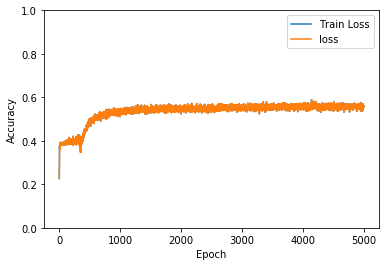

In [15]:
plot_history(history)

In [33]:
print(history.history['acc'])

[0.2266894781992311, 0.2848588537338761, 0.30025662967442857, 0.32848588549958224, 0.3609923011885432, 0.37895637337625077, 0.36270316517485623, 0.35928143718948313, 0.38066723696740906, 0.36441402916116933, 0.378956373146806, 0.3926432848843476, 0.3789563730448306, 0.3840889649400352, 0.3823781011194322, 0.38836612491856487, 0.3815226690243002, 0.3883661249695526, 0.3883661249695526, 0.38922155729412933, 0.39178785294217877, 0.3892215570136969, 0.38323353334203347, 0.38665526126367195, 0.3849443969459387, 0.3832335329468787, 0.39007698890487796, 0.392643284986323, 0.3840889650037699, 0.3875106930273838, 0.3900769889558657, 0.38922155714116613, 0.38579982891997483, 0.3909324210000099, 0.3883661249695526, 0.3875106932568285, 0.38922155729412933, 0.3789563730958183, 0.3798118049742525, 0.3875106930273838, 0.3892215570136969, 0.3866552609832395, 0.3900769889558657, 0.3875106930273838, 0.38665526131465966, 0.3866552609322518, 0.3798118050379871, 0.3849443969459387, 0.38323353334203347, 0.3

In [20]:
import sklearn.metrics as acc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [17]:
clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train,y_train)

In [22]:
prediction = clf.predict(X_test)
prediction

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

In [21]:
accuracy = acc.accuracy_score(y_test, prediction, normalize=True)
print("accuracy: {}".format(accuracy))

accuracy: 0.07584830339321358


In [23]:
y_test

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [24]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [26]:
forest = RandomForestClassifier(n_estimators=64, random_state=1)

In [27]:
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

In [28]:
mtf = multi_target_forest.fit(X_train, y_train)

In [29]:
y_pred = mtf.predict(X_test)

In [32]:
accuracy2 = acc.accuracy_score(y_test, y_pred, normalize=True)
print("accuracy: {}".format(accuracy))

accuracy: 0.07584830339321358


In [34]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import re

'1.12.0'

In [100]:
def dataset_prep_reg():
    ''' Read data from a csv file and use keras preprocessing to create 
    data matrix with sequence of integers for each sentence padded with 
    zeros'''
    tokenizer = Tokenizer()
    # Read data from csv file
    df = pd.read_csv("C:/Users/SODIQ-PC/Desktop/Capstone_1819/turk_data.csv",sep=',')

    # Extract the response column from data
    data = df['turk_response_text']
    label = np.array(df[['1','2','3']])
    
    y1 = label[:,0]
    y2 = label[:,1]
    y3 = label[:,2]
    
    # convert each sentence to a string and make all data into a list
    corpus = [str(data[i]).lower() for i in range(len(data))]
    
    #tokenize the corpus removing punctuations and get unique vocabulary of of corpus
    tokenizer.fit_on_texts(corpus)
    
    # split data into train and test set
    x_train, x_test, y1_train, y1_test = train_test_split(corpus, y1, test_size=0.2, random_state=10)
    
    return x_train, x_test, y1_train, y1_test

In [103]:
x_train, x_test, y1_train, y1_test = dataset_prep_reg()

In [112]:
train_df = pd.DataFrame(columns = ['sentence', 'score'])
train_df['sentence'] = x_train
train_df['score'] = y1_train

In [113]:
test_df = pd.DataFrame(columns = ['sentence', 'score'])
test_df['sentence'] = x_test
test_df['score'] = y1_test

In [115]:
train_df.head()

,sentence,score
0,the plane being delayed is no worry. until it ...,3
1,we are giving the locals what we have based on...,5
2,"now that we have some privacy, can you tell me...",3
3,"there are crates full of food, water, and hosp...",5
4,"unfortunately, he was otherwise occupied. i wi...",1


In [116]:
test_df.head()

,sentence,score
0,"now that we're alone, why did you suggest sett...",3
1,"i know you have men free, could you please all...",1
2,i have no more questions for now.,1
3,i'm not sure if it would be any help to you no...,1
4,"we have the supplies needed, we just need a fe...",1


In [275]:
# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    #message_embeddings = session.run(m(x_train))
    test_embeddings = session.run(m(x_test))

'for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):\n    \n   print("sentence: {}".format(x_train[i]))\n    print("Embedding size: {}".format(len(message_embedding)))\n    message_embedding_snippet = ", ".join(\n        (str(x) for x in message_embedding[:3]))\n    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))'

In [180]:
# Download the module to temp folder
m = hub.Module("https://tfhub.dev/google/nnlm-en-dim128/1")

embedded_text_feature_column = hub.text_embedding_column(
    key="sentence", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")

In [256]:
x = np.array(message_embeddings)
df_train = pd.DataFrame(columns=['embeddings', 'score'])
df_train['embeddings'] = np.array(message_embeddings).tolist()
df_train['score'] = y1_train

In [276]:
test = np.array(test_embeddings)

In [268]:
def baseline_reg_model(x):
    ''' Create a baseline classification model '''
    model = Sequential()
    model.add(Dense(units=512, activation='relu', input_dim=x.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=1))
    
    model.compile(loss='mse',optimizer='rmsprop',metrics=['mean_absolute_error'])
    model_reg = model
    return model_reg

In [271]:
model = baseline_reg_model(x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 82,497
Trainable params: 82,497
Non-trainable params: 0
_________________________________________________________________


In [272]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 5000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='acc', patience=20)

# Store training stats
history = model.fit(x, y1_train, epochs=EPOCHS,
                    validation_split = 0.2,
                    verbose=0, callbacks=[early_stop, PrintDot()])

C:\Users\SODIQ-PC\Miniconda3\envs\tensorflow\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss,mean_absolute_error,val_mean_absolute_error,val_loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [285]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


Text(0.5,1,'model loss')

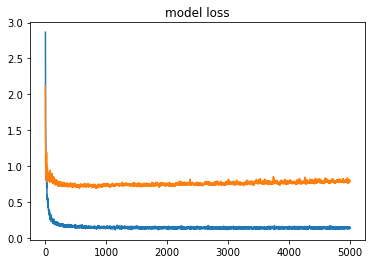

In [287]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')

In [288]:
y_pred = model.predict(test)

In [ ]:
model.evaluate(test)

In [284]:
plot(history, metrics = "mean_absolute_error", smooth = FALSE) + coord_cartesian(ylim = c(0, 5))

NameError: name 'plot' is not defined

KeyError: 'mean_squared_error'

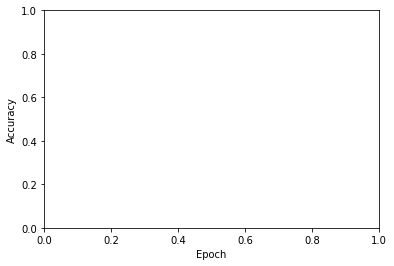

In [280]:
plot_history(history)

In [198]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["score"], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["score"], shuffle=False)

# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
    test_df, test_df["score"], shuffle=False)

In [206]:
# Use DNNClassifier
estimator = tf.estimator.DNNRegressor(
    hidden_units=[1024, 128],
    feature_columns=[embedded_text_feature_column],
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': 'worker', '_device_fn': None, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_task_id': 0, '_evaluation_master': '', '_protocol': None, '_keep_checkpoint_max': 5, '_experimental_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_model_dir': 'C:\\Users\\SODIQ-PC\\AppData\\Local\\Temp\\tmprpygwpv1', '_train_distribute': None, '_num_worker_replicas': 1, '_eval_distribute': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_service': None, '_is_chief': True, '_num_ps_replicas': 0, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019691D90D30>}


In [207]:
# Training for 1,000 steps means 128,000 training examples with the default
# batch size. This is roughly equivalent to 5 epochs since the training dataset
# contains 25,000 examples.
estimator.train(input_fn=train_input_fn, steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SODIQ-PC\AppData\Local\Temp\tmprpygwpv1\model.ckpt.
INFO:tensorflow:loss = 847.5375, step = 0
INFO:tensorflow:global_step/sec: 135.774
INFO:tensorflow:loss = 96.69075, step = 100 (0.739 sec)
INFO:tensorflow:global_step/sec: 198.943
INFO:tensorflow:loss = 43.42592, step = 200 (0.501 sec)
INFO:tensorflow:global_step/sec: 200.937
INFO:tensorflow:loss = 26.079952, step = 300 (0.499 sec)
INFO:tensorflow:global_step/sec: 190.959
INFO:tensorflow:loss = 24.749737, step = 400 (0.524 sec)
INFO:tensorflow:global_step/sec: 201.34
INFO:t

In [209]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
predictions = estimator.predict(input_fn = predict_test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-04-04:05:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SODIQ-PC\AppData\Local\Temp\tmprpygwpv1\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-04-04:05:11
INFO:tensorflow:Saving dict for global step 5000: average_loss = 0.005452241, global_step = 5000, label/mean = 2.3420658, loss = 0.66219944, prediction/mean = 2.3406034
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\SODIQ-PC\AppData\Local\Temp\tmprpygwpv1\model.ckpt-5000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables 

In [229]:
print("Training set accuracy: {mean_absolute_error}".format(**train_eval_result))
print("Test set accuracy: {mean_absolute_error}".format(**test_eval_result))

KeyError: 'mean_absolute_error'

AttributeError: 'DNNRegressor' object has no attribute 'step'

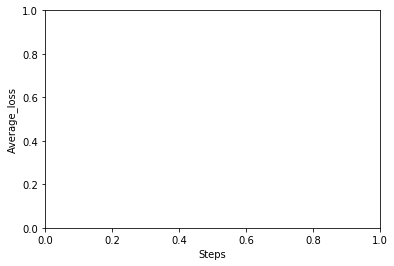

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 5000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='acc', patience=20)

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    verbose=0, callbacks=[early_stop, PrintDot()])